In [2]:
#import important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#model building 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#import datase
df = pd.read_csv("yield_df.csv")
df.sample(20)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21490,21490,Nicaragua,Potatoes,2013,170847,2280.0,4413.82,27.26
5714,5714,Canada,Soybeans,1995,27882,537.0,32223.40,6.38
18556,18556,Mali,Soybeans,1995,16364,282.0,28.73,27.25
12129,12129,India,Maize,1999,17922,1083.0,46195.00,26.21
19855,19855,Mexico,Sweet potatoes,2004,218597,758.0,26433.14,16.20
18395,18395,Malawi,Soybeans,2011,9977,1181.0,553.57,20.92
13601,13601,India,Sorghum,2008,10209,1083.0,14485.33,26.83
19624,19624,Mexico,Maize,2000,24620,758.0,34468.93,21.12
24476,24476,Slovenia,Potatoes,1993,125740,1162.0,1112.00,10.19
4439,4439,Brazil,Maize,2010,43667,1761.0,342580.00,20.72


## Initial Exploration & Data Cleaning

In [3]:
df.isnull().sum()
df.drop('Unnamed: 0',axis=1,inplace=True) 
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df = df.rename(columns={"hg/ha_yield": "yield"})


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   yield                          25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [5]:
df.head()

,Area,Item,Year,yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df["Area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [7]:
df["Area"].value_counts()

Area
India         3384
Brazil        1854
Mexico        1280
Australia      966
Pakistan       966
              ... 
Latvia          42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

# Exploratory Data Analysis (EDA)

### Count of Entries in Each Area

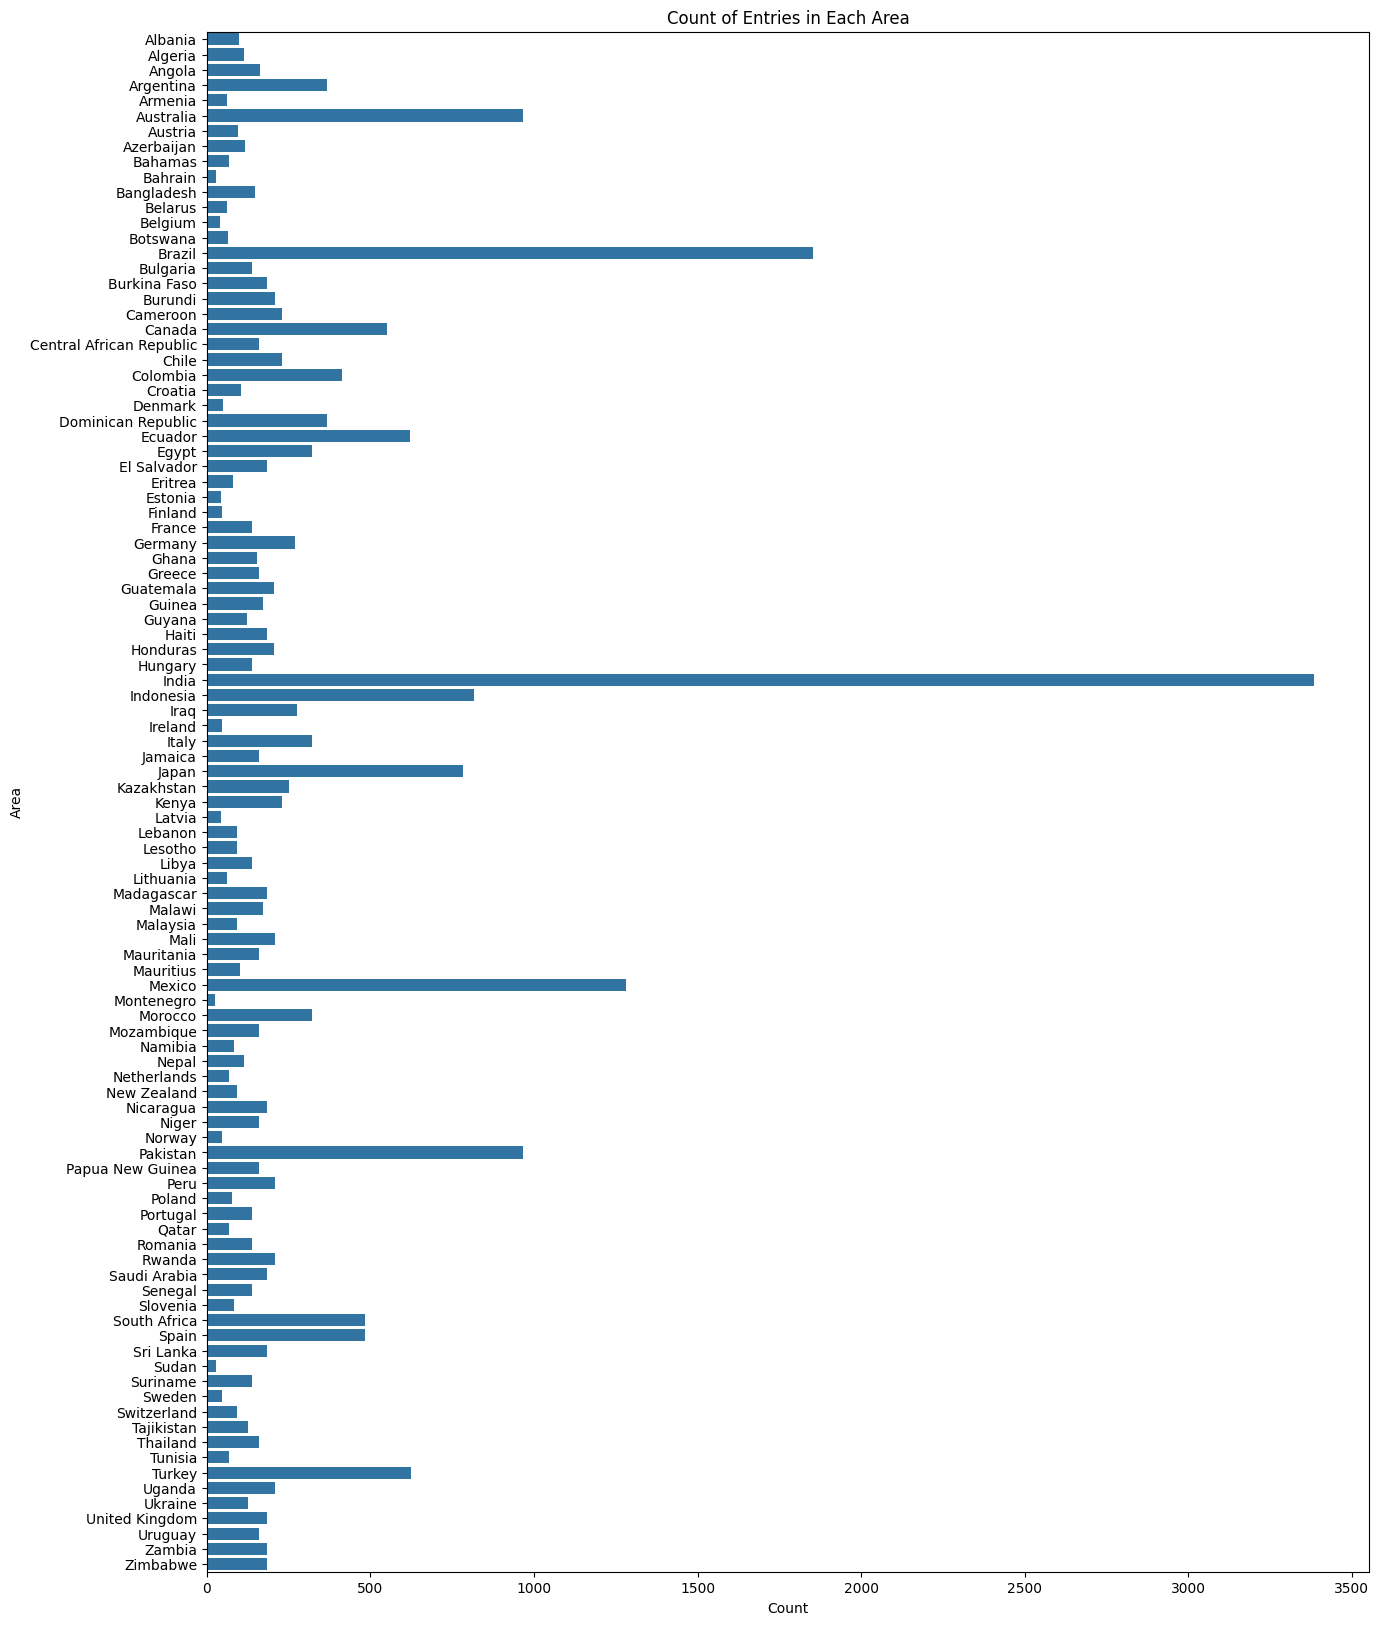

In [8]:
plt.figure(figsize=(15, 20))
sns.countplot(y=df['Area'])
plt.xlabel("Count")
plt.ylabel("Area")
plt.title("Count of Entries in Each Area")
plt.show()

The countplot shows the distribution of crop data across different countries. India dominates the dataset with the highest number of crop entries, followed by Brazil, Mexico, Australia, and Pakistan. This suggests that India, Brazil, and Mexico are significant contributors to agricultural data collection. 

Conversely, countries like Estonia, Belgium, Bahrain, Sudan, and Montenegro have comparatively fewer crop entries, indicating less representation in the dataset. 

Understanding the distribution of crop data among countries can provide valuable insights into where agricultural research and intervention efforts may be most needed, potentially aiding in global food security initiatives and resource allocation in agriculture.

### Trend of Yield Over the Years

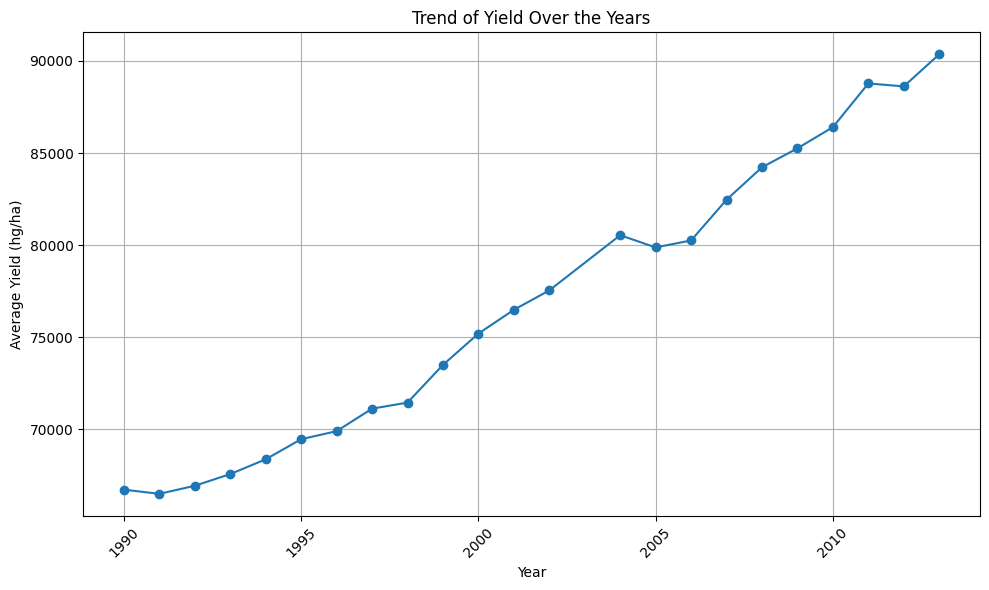

In [9]:
# Group the data by Year and calculate the average yield
yield_over_years = df.groupby('Year')['yield'].mean()

# Plotting the trend of yield over the years
plt.figure(figsize=(10, 6))
plt.plot(yield_over_years.index, yield_over_years.values, marker='o', linestyle='-')
plt.title('Trend of Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The trend of crop yield over the years reveals interesting insights. Overall, we observe fluctuations in yield, with some years showing higher average yields compared to others. 







### Distribution of Pesticide Usage by Crop Type

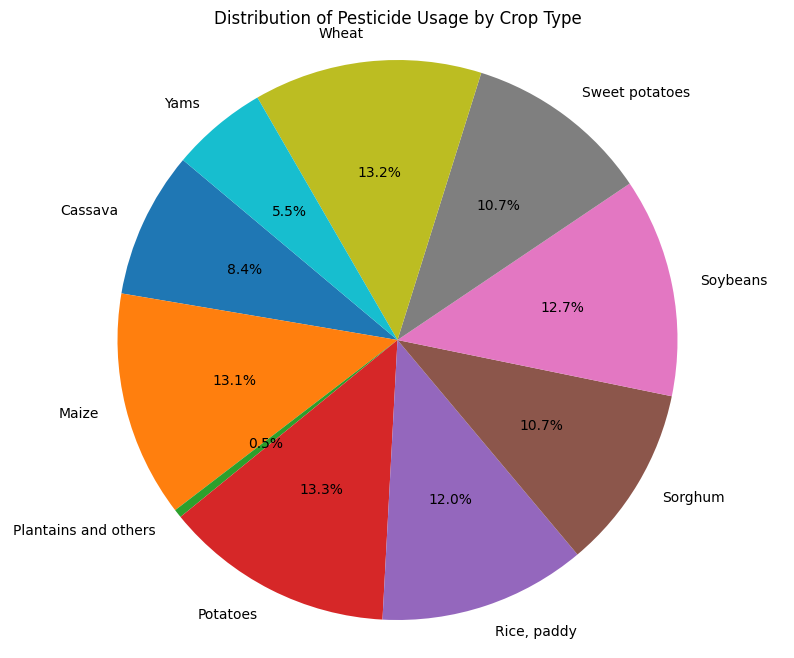

In [10]:
pesticide_by_crop = df.groupby('Item')['pesticides_tonnes'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(pesticide_by_crop['pesticides_tonnes'], labels=pesticide_by_crop['Item'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pesticide Usage by Crop Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart illustrates the distribution of pesticide usage among various crop types. Potatoes account for the largest share at 13.3%, followed closely by wheat at 13.2% and maize at 13.1%. 

Understanding these usage patterns can guide agricultural practices towards sustainable and efficient pesticide use for optimal crop production.

### Yield Variability Across Different Crop Types 

<Figure size 1000x600 with 0 Axes>

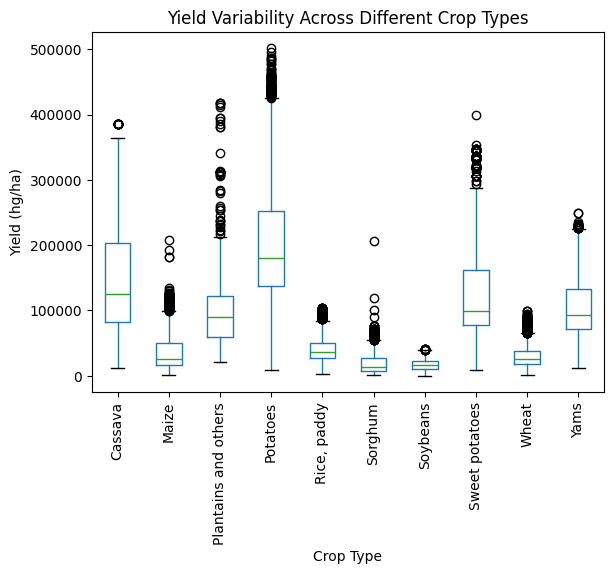

In [11]:
# Boxplot of yield variability across different crop types
plt.figure(figsize=(10, 6))
df.boxplot(column='yield', by='Item', grid=False, rot=90)
plt.title('Yield Variability Across Different Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Yield (hg/ha)')
plt.suptitle('') 
plt.show()

The boxplot analysis reveals varying yield variability across different crop types. 

Some crops exhibit wider ranges of yield, indicating greater susceptibility to fluctuations, while others show more consistent yields. For farmers and policymakers, understanding these variations is crucial for planning and decision-making. Crops with higher variability may require more robust management practices to mitigate risks and ensure stable production.

Conversely, crops with lower variability may offer more predictable yields, providing opportunities for strategic planning and resource allocation. Overall, this insight can inform agricultural strategies to optimize productivity and resilience in the face of changing environmental and market conditions.

### Finding the index of maximum yield for each country

In [12]:
country_crop_yield = df.groupby(['Area', 'Item'])['yield'].sum().reset_index()

# Finding the index of maximum yield for each country
idx_max_yield = country_crop_yield.groupby('Area')['yield'].idxmax()

# Getting the rows with maximum yield for each country
max_yield_per_country = country_crop_yield.loc[idx_max_yield]

# Displaying the result
print(max_yield_per_country)

               Area      Item     yield
1           Albania  Potatoes   3521416
7           Algeria  Potatoes   4195521
11           Angola   Cassava   2076309
21        Argentina  Potatoes  12054722
28          Armenia  Potatoes   3172615
..              ...       ...       ...
568         Ukraine  Potatoes   2625816
573  United Kingdom  Potatoes  37364116
576         Uruguay  Potatoes   3374952
584          Zambia  Potatoes   2663415
592        Zimbabwe  Potatoes   3702205

[101 rows x 3 columns]


### Country-wise Maximum Yield for Each Crop

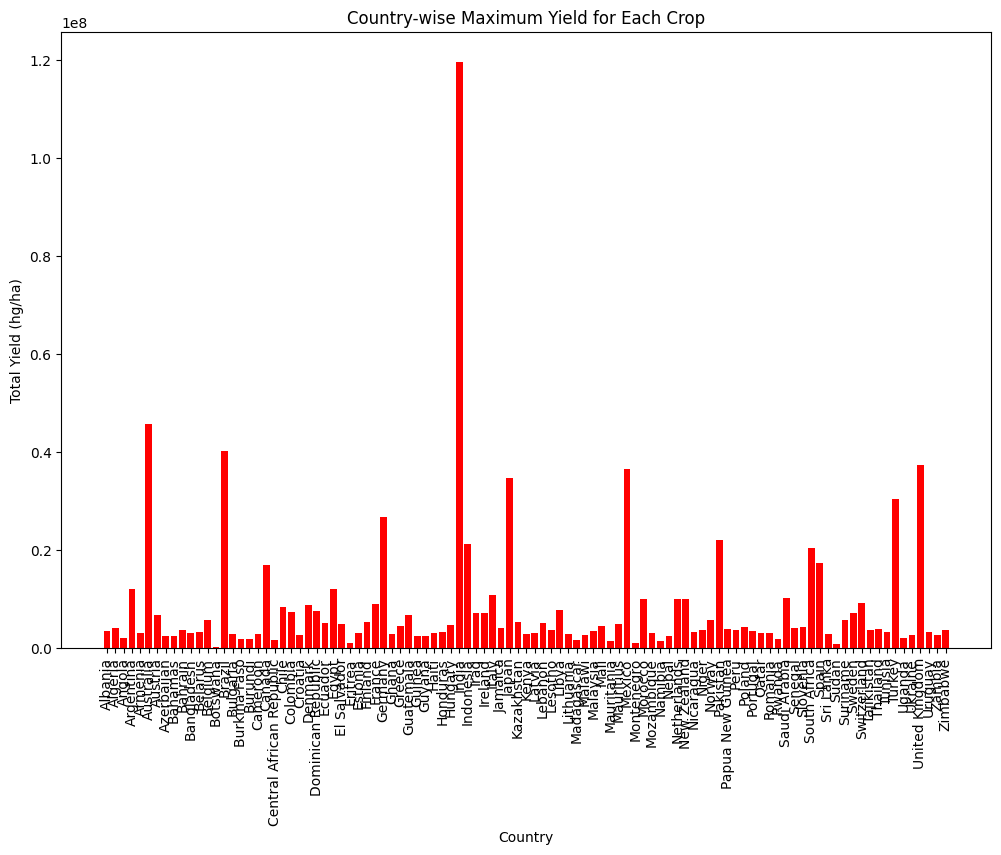

In [13]:
# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(max_yield_per_country['Area'], max_yield_per_country['yield'], color='red')
plt.xlabel('Country')
plt.ylabel('Total Yield (hg/ha)')
plt.title('Country-wise Maximum Yield for Each Crop')
plt.xticks(rotation=90)
plt.show()


# Exploratory Analysis of Each Crop

In [14]:
df["Item"].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

# Potato

Country with the highest potato yield:
Area        India
yield    77126500
Name: 38, dtype: object


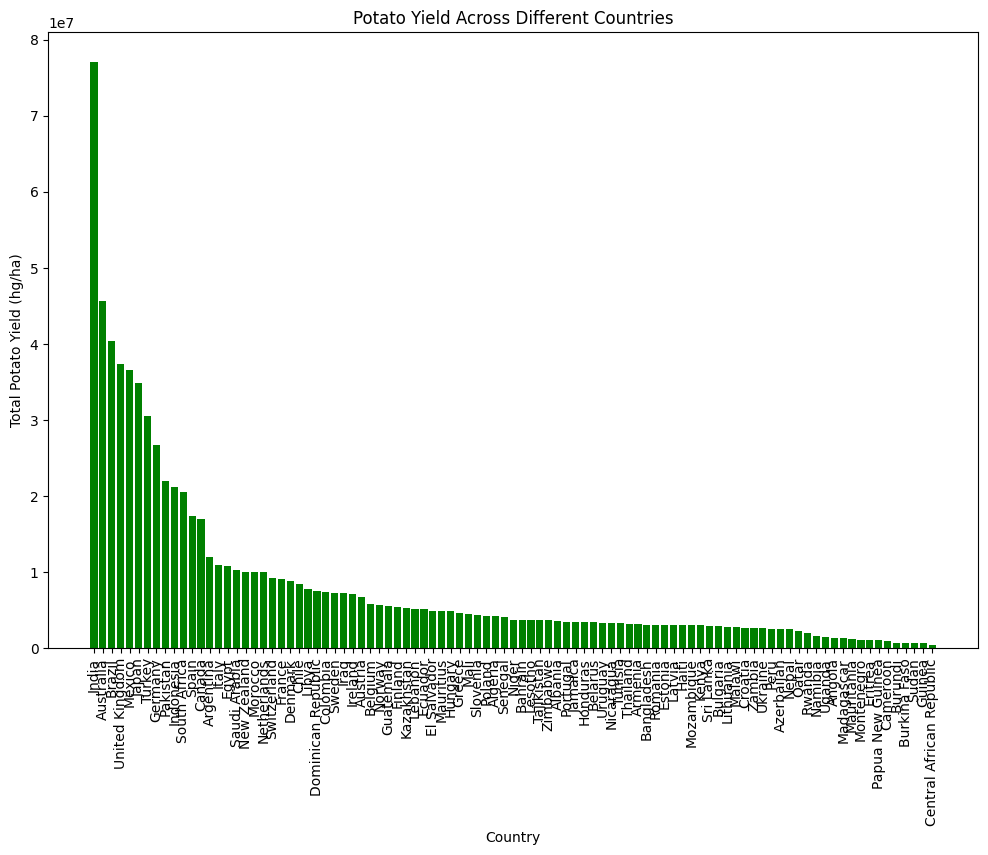

In [15]:

potato_data = df[df['Item'] == 'Potatoes']


potato_yield_by_country = potato_data.groupby('Area')['yield'].sum().reset_index()


country_with_highest_potato_yield = potato_yield_by_country.loc[potato_yield_by_country['yield'].idxmax()]


print("Country with the highest potato yield:")
print(country_with_highest_potato_yield)


potato_yield_by_country_sorted = potato_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(potato_yield_by_country_sorted['Area'], potato_yield_by_country_sorted['yield'], color='green')
plt.xlabel('Country')
plt.ylabel('Total Potato Yield (hg/ha)')
plt.title('Potato Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

The analysis reveals that India has the highest potato yield among all countries, with a remarkable yield of 77,126,500 hg/ha. This suggests that India is a significant contributor to global potato production. 

Factors such as favorable climate, agricultural practices, and infrastructure may contribute to India's high potato yield. Understanding which countries excel in potato production is essential for global food security and trade dynamics. 

India's impressive yield underscores its importance in meeting the growing demand for potatoes worldwide. Further research into India's agricultural strategies and their applicability in other regions could enhance potato production globally.

# Maize

Country with the highest Maize yield:
Area       Canada
yield    10721406
Name: 18, dtype: object


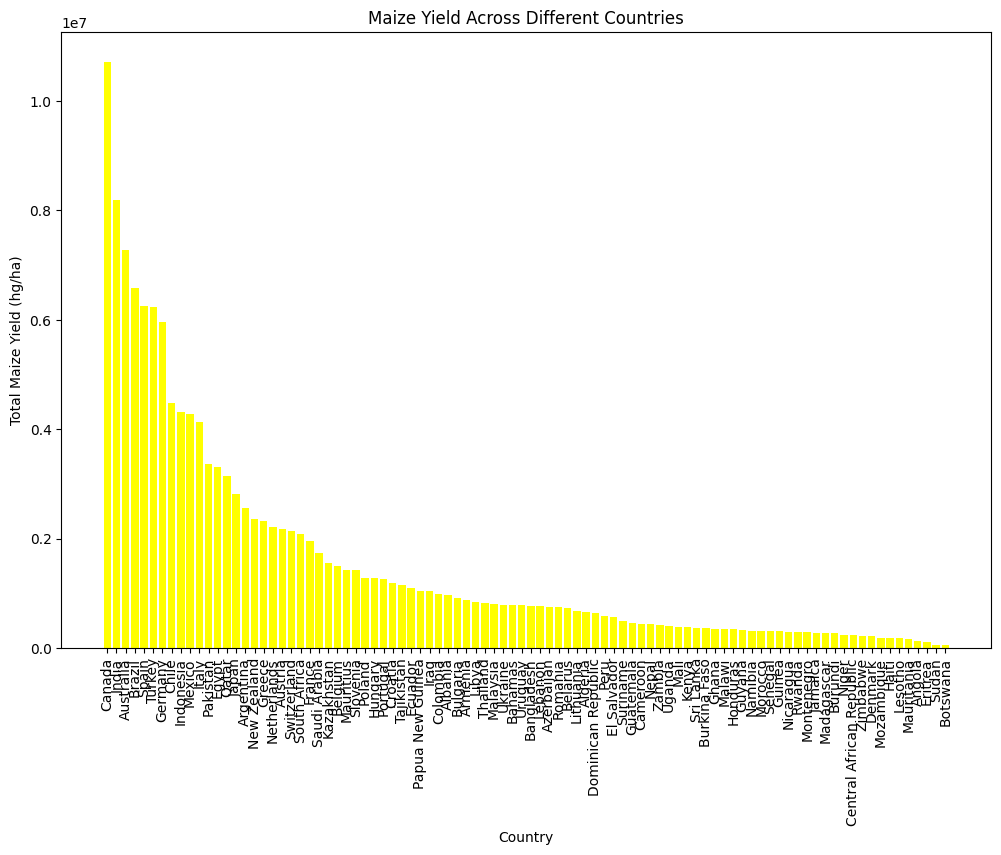

In [16]:
# Filter the dataframe to include only rows where the crop is 'Potatoes'
Maize_data = df[df['Item'] == 'Maize']

# Group by country and sum up the yield
Maize_yield_by_country = Maize_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Maize yield
country_with_highest_Maize_yield = Maize_yield_by_country.loc[Maize_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest Maize yield:")
print(country_with_highest_Maize_yield)

# Sort the dataframe by potato yield in descending order
Maize_yield_by_country_sorted = Maize_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Maize_yield_by_country_sorted['Area'], Maize_yield_by_country_sorted['yield'], color='yellow')
plt.xlabel('Country')
plt.ylabel('Total Maize Yield (hg/ha)')
plt.title('Maize Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

The data analysis reveals that Canada has the highest maize yield, producing 10,721,406 hg/ha of maize. This indicates Canada's significant contribution to maize production globally. Factors such as favorable climatic conditions, advanced agricultural practices, and efficient farming techniques likely contribute to Canada's high maize yield.

## Wheat 

Country with the highest Wheat yield:
Area        India
yield    11242040
Name: 32, dtype: object


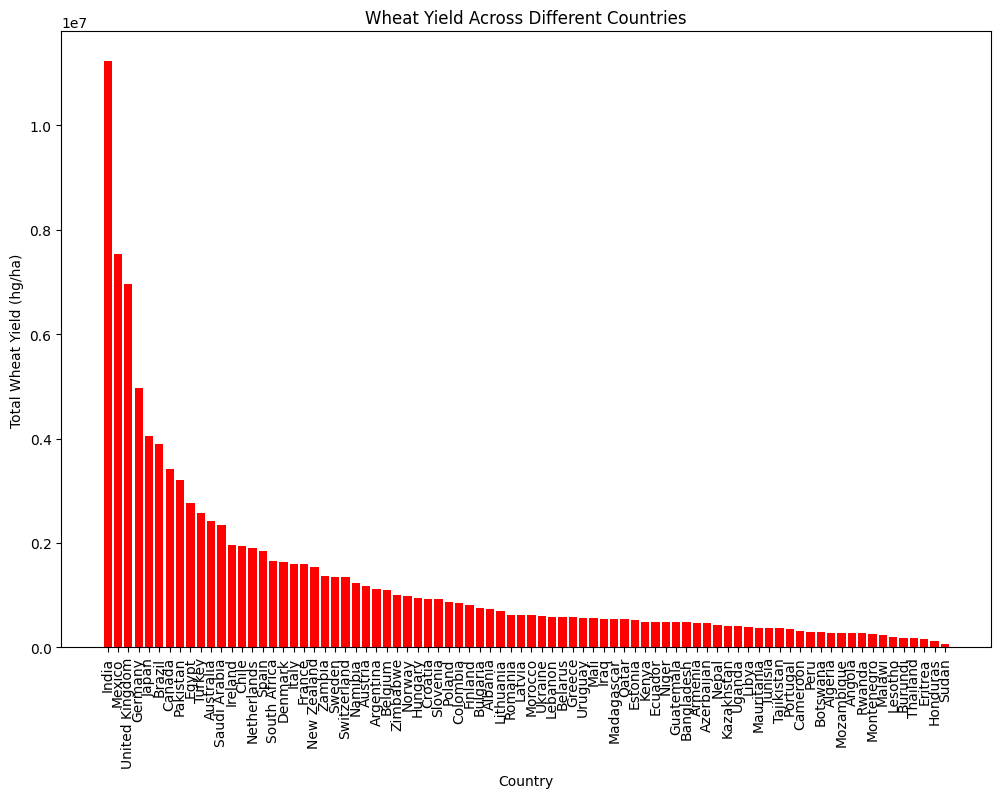

In [17]:
# Filter the dataframe to include only rows where the crop is 'Wheat'
Wheat_data = df[df['Item'] == 'Wheat']

# Group by country and sum up the yield
Wheat_yield_by_country = Wheat_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Maize yield
country_with_highest_Wheat_yield = Wheat_yield_by_country.loc[Wheat_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest Wheat yield:")
print(country_with_highest_Wheat_yield)

# Sort the dataframe by potato yield in descending order
Wheat_yield_by_country_sorted = Wheat_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Wheat_yield_by_country_sorted['Area'], Wheat_yield_by_country_sorted['yield'], color='red')
plt.xlabel('Country')
plt.ylabel('Total Wheat Yield (hg/ha)')
plt.title('Wheat Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

# Soybeans

Country with the highest soybeans yield:
Area      Brazil
yield    4975709
Name: 7, dtype: object


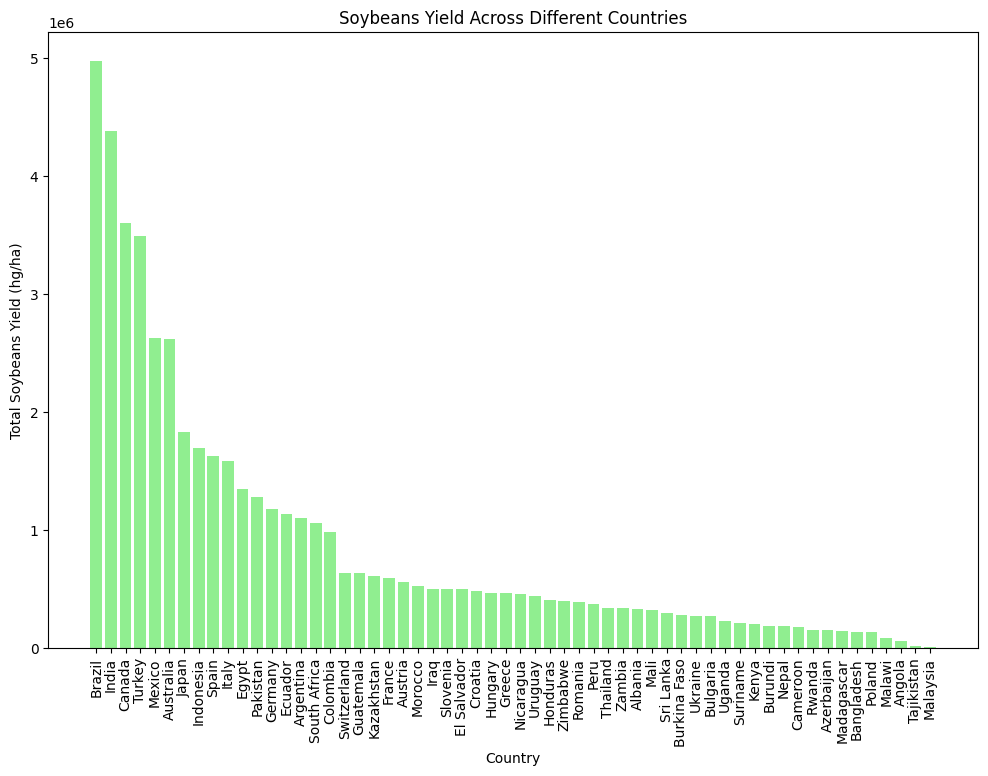

In [18]:
# Filter the dataframe to include only rows where the crop is 'Soybeans'
Soybeans_data = df[df['Item'] == 'Soybeans']

# Group by country and sum up the yield
Soybeans_yield_by_country = Soybeans_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Maize yield
country_with_highest_Soybeans_yield = Soybeans_yield_by_country.loc[Soybeans_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest soybeans yield:")
print(country_with_highest_Soybeans_yield)

# Sort the dataframe by potato yield in descending order
Soybeans_yield_by_country_sorted = Soybeans_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Soybeans_yield_by_country_sorted['Area'], Soybeans_yield_by_country_sorted['yield'], color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Total Soybeans Yield (hg/ha)')
plt.title('Soybeans Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

The data analysis reveals that Brazil has the highest soybean yield, with a remarkable output of 4,975,709 hg/ha. This result underscores Brazil's significant role in soybean production globally. Factors such as favorable climate conditions, advanced agricultural practices, and extensive cultivation areas contribute to Brazil's success in soybean farming. 

# Sorghum

Country with the highest Sorghum yield:
Area      Mexico
yield    5414755
Name: 41, dtype: object


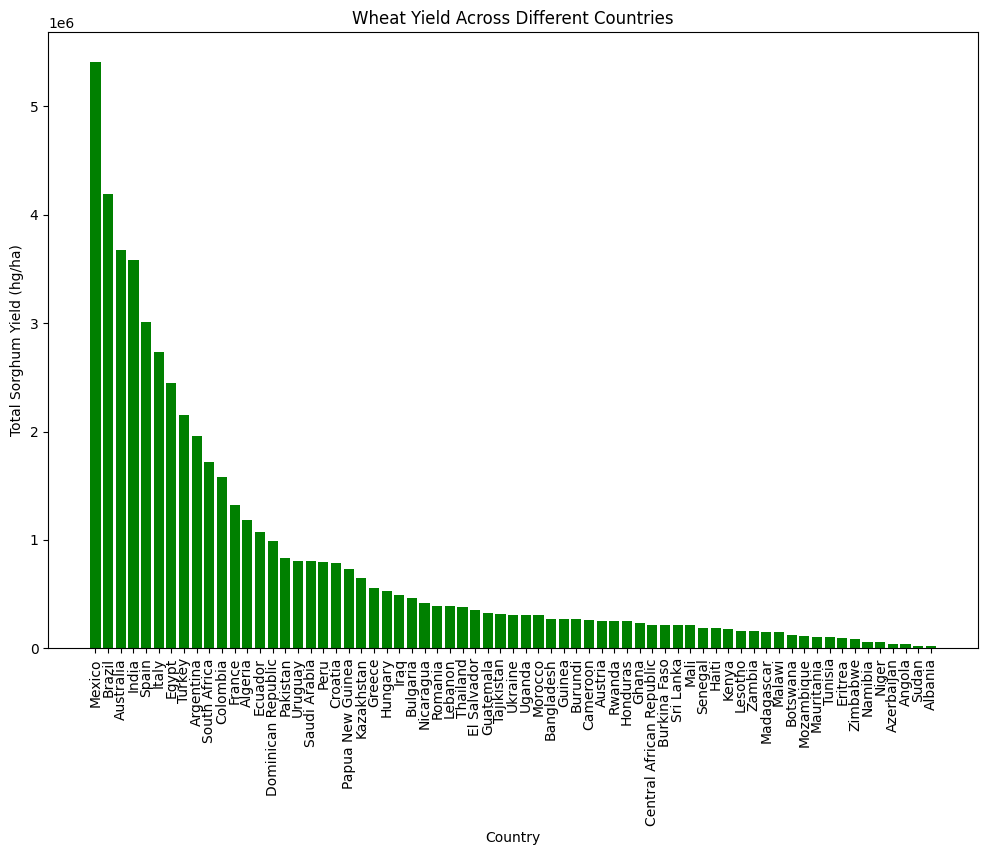

In [19]:
# Filter the dataframe to include only rows where the crop is 'Sorghum'
Sorghum_data = df[df['Item'] == 'Sorghum']

# Group by country and sum up the yield
Sorghum_yield_by_country = Sorghum_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Sorghum yield
country_with_highest_Sorghum_yield = Sorghum_yield_by_country.loc[Sorghum_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest Sorghum yield:")
print(country_with_highest_Sorghum_yield)

# Sort the dataframe by Sorghum yield in descending order
Sorghum_yield_by_country_sorted = Sorghum_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Sorghum_yield_by_country_sorted['Area'], Sorghum_yield_by_country_sorted['yield'], color='green')
plt.xlabel('Country')
plt.ylabel('Total Sorghum Yield (hg/ha)')
plt.title('Wheat Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

Mexico stands out as the leading producer of sorghum, with an impressive yield of 5,414,755 hg/ha. This significant yield underscores Mexico's prowess in sorghum cultivation, likely influenced by favorable climatic conditions, agricultural practices, and perhaps governmental support. The high yield indicates Mexico's capacity for efficient sorghum production, contributing to food security and economic stability. Such agricultural success can inspire other nations, highlighting the importance of strategic agricultural policies, research, and investment in sustainable farming practices. Mexico's achievement in sorghum cultivation exemplifies the potential for countries to excel in crop production, fostering resilience and prosperity in the agricultural sector on a global scale.

# Cassava

Country with the highest Cassava_yield:
Area         India
yield    119691113
Name: 18, dtype: object


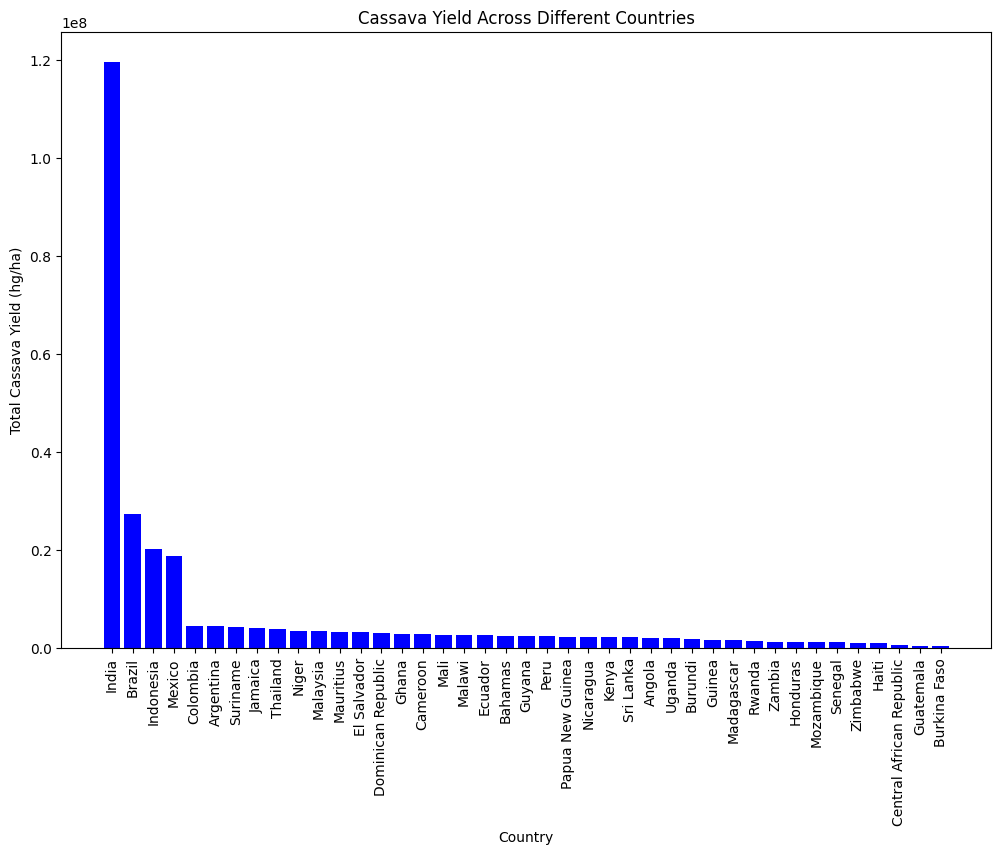

In [20]:
# Filter the dataframe to include only rows where the crop is 'Cassava'
Cassava_data = df[df['Item'] == 'Cassava']

# Group by country and sum up the yield
Cassava_yield_by_country = Cassava_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Cassava yield
country_with_highest_Cassava_yield = Cassava_yield_by_country.loc[Cassava_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest Cassava_yield:")
print(country_with_highest_Cassava_yield)

# Sort the dataframe by potato yield in descending order
Cassava_yield_by_country_sorted = Cassava_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Cassava_yield_by_country_sorted['Area'], Cassava_yield_by_country_sorted['yield'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Cassava Yield (hg/ha)')
plt.title('Cassava Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

The analysis reveals that India has the highest cassava yield among all countries, producing a staggering 119,691,113 hg/ha. This indicates India's significant contribution to global cassava production. Such high yields suggest favorable growing conditions, efficient agricultural practices, and possibly government support for cassava cultivation in India. 

# Yams

Country with the highest Yams yield:
Area        Japan
yield    23620526
Name: 12, dtype: object


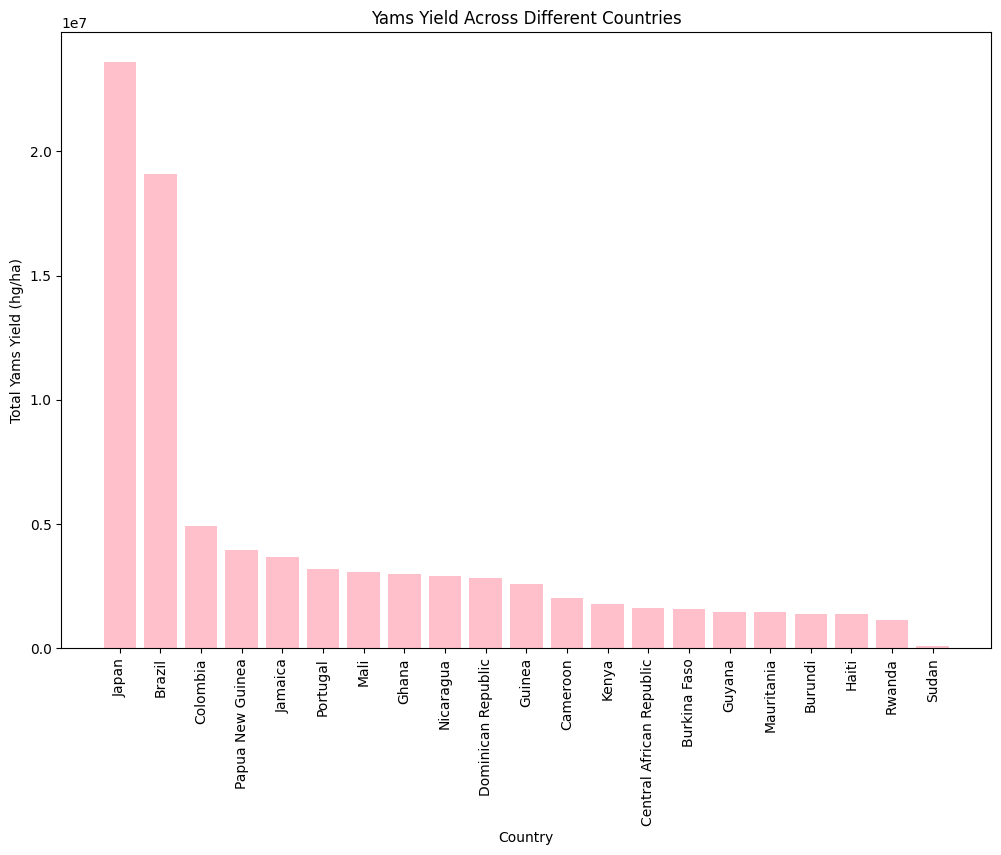

In [21]:
# Filter the dataframe to include only rows where the crop is 'Yams'
Yams_data = df[df['Item'] == 'Yams']

# Group by country and sum up the yield
Yams_yield_by_country = Yams_data.groupby('Area')['yield'].sum().reset_index()

# Find the country with the highest Yams yield
country_with_highest_Yams_yield = Yams_yield_by_country.loc[Yams_yield_by_country['yield'].idxmax()]

# Display the result
print("Country with the highest Yams yield:")
print(country_with_highest_Yams_yield)

# Sort the dataframe by potato yield in descending order
Yams_yield_by_country_sorted = Yams_yield_by_country.sort_values(by='yield', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(Yams_yield_by_country_sorted['Area'], Yams_yield_by_country_sorted['yield'], color='pink')
plt.xlabel('Country')
plt.ylabel('Total Yams Yield (hg/ha)')
plt.title('Yams Yield Across Different Countries')
plt.xticks(rotation=90)
plt.show()

Japan leads in yams production with an impressive yield of 23,620,526 hg/ha, according to the dataset. This high yield signifies Japan's proficiency and success in yams cultivation. Factors contributing to Japan's success could include favorable climatic conditions, advanced agricultural practices, and efficient farming techniques. 



# Long-term Yield Trends for different differents Crops

## Wheat

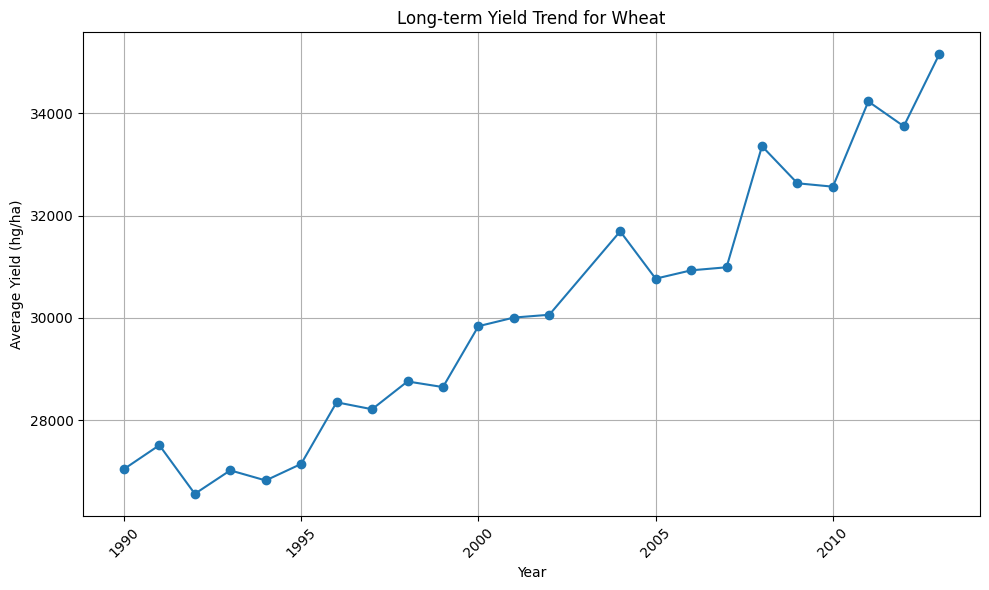

In [22]:
crop = "Wheat"  # Change this to the crop you want to analyze

# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of long-term yield trends for specific crops reveals valuable insights. We observed fluctuations in crop yields over the years, indicating varying agricultural conditions. For example, wheat yields showed a gradual increase from 1990 to 2013, suggesting possible advancements in farming practices or technology. However, these trends may also reflect the influence of external factors like weather patterns or agricultural policies. Understanding these long-term trends can aid farmers and policymakers in making informed decisions to improve crop productivity and ensure food security in the face of changing environmental and socio-economic conditions.

## Potatoes

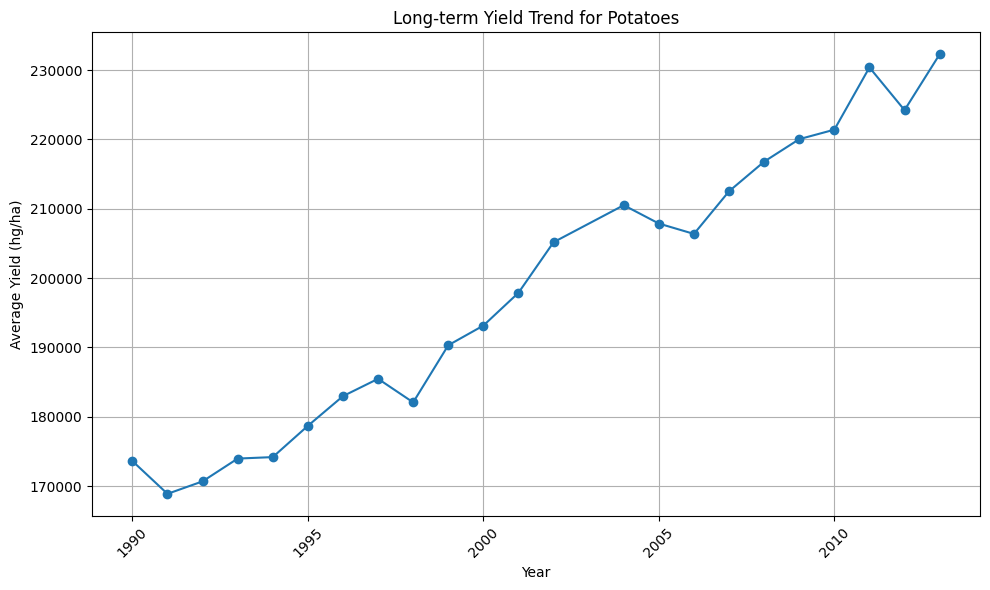

In [23]:
crop = "Potatoes" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of long-term yield trends for potatoes highlights interesting patterns. Over the years, we observed fluctuations in potato yields, suggesting variations in agricultural conditions. For instance, there was a notable increase in yields from 1990 to 2001, followed by a slight decline. 

These trends may reflect changes in farming practices, technological advancements, or environmental factors. Understanding these long-term patterns can assist farmers and policymakers in making informed decisions to enhance potato productivity and ensure food security. Further research into the underlying causes of these trends can provide valuable insights for sustainable potato farming practices in the future.

## Maize

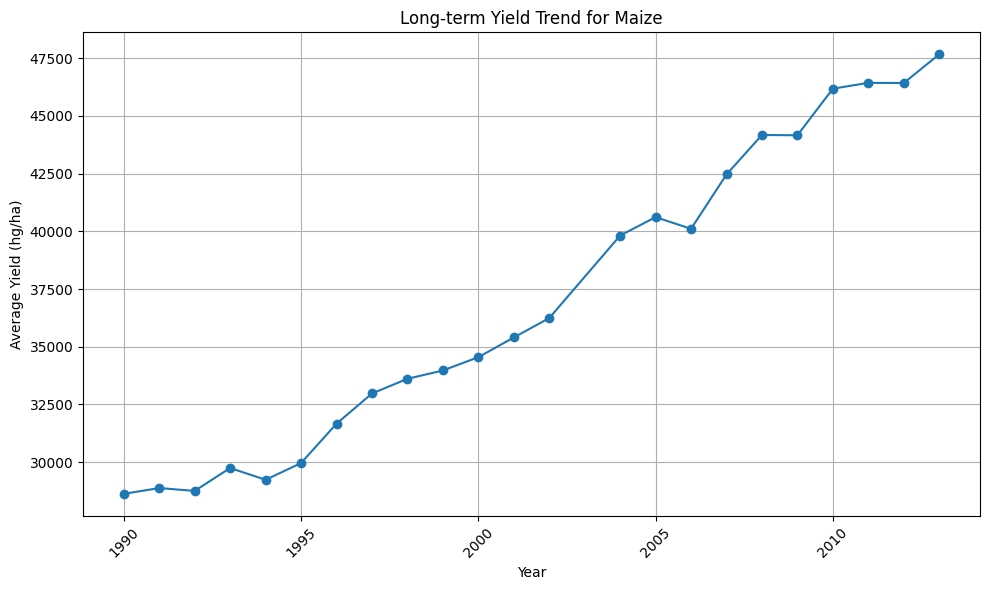

In [24]:
crop = "Maize" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of long-term yield trends for maize highlights significant patterns and insights. Over the years, maize yields have shown fluctuations, indicating variations in agricultural conditions. For instance, we observed a steady increase in maize yields from 1990 to 2013, suggesting potential improvements in farming techniques or technology. However, these trends may also be influenced by external factors like weather conditions or agricultural policies. 

Understanding these long-term patterns can assist farmers and policymakers in making informed decisions to enhance maize productivity and ensure food security amidst changing environmental and socio-economic circumstances.

## Soybeans

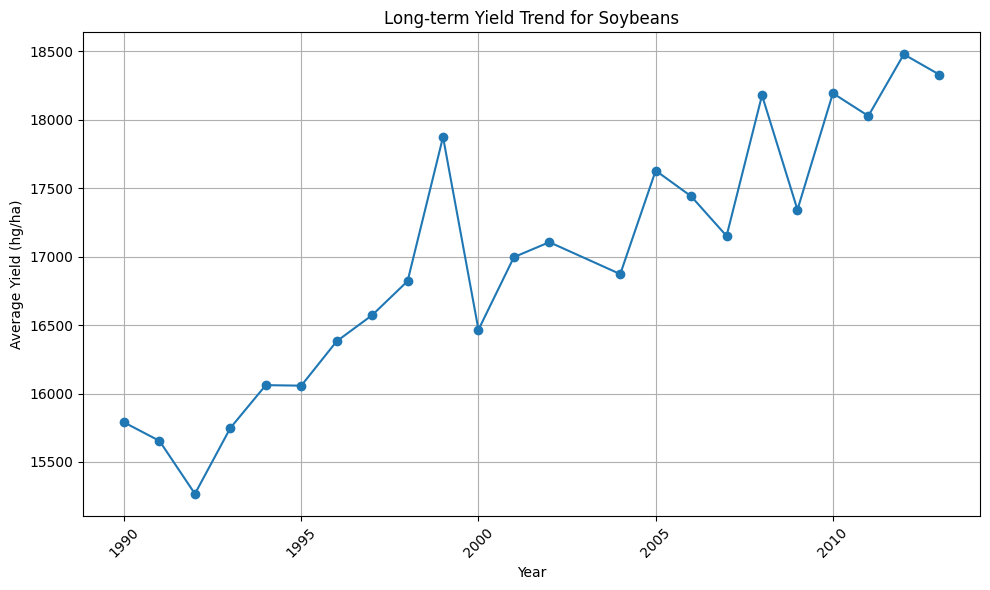

In [25]:
crop = "Soybeans" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of long-term yield trends for soybeans offers insightful observations. We observed fluctuations in soybean yields over the years, suggesting variations in agricultural conditions. From 1990 to 2013, soybean yields displayed a mix of fluctuations and stability, indicating the influence of various factors like weather patterns, technological advancements, and agricultural practices.

## Sorghum

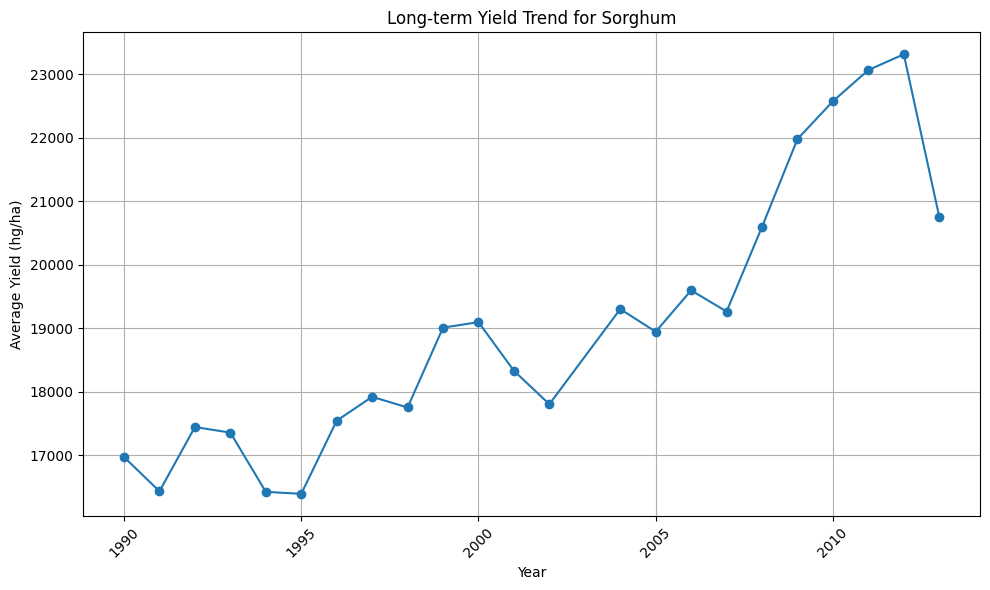

In [26]:
crop = "Sorghum" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analyzing the long-term yield trend for Sorghum provides valuable insights into its productivity over the years. The data suggests fluctuations in Sorghum yields, indicating the influence of various factors such as climate conditions, agricultural practices, and technological advancements. 


While some years show higher yields, others exhibit lower productivity, highlighting the crop's sensitivity to environmental changes. Understanding these trends can assist farmers and policymakers in implementing strategies to enhance Sorghum yield stability and overall agricultural sustainability. By addressing challenges and leveraging opportunities, stakeholders can work towards improving Sorghum production and ensuring food security for communities relying on this important crop.








## Cassava

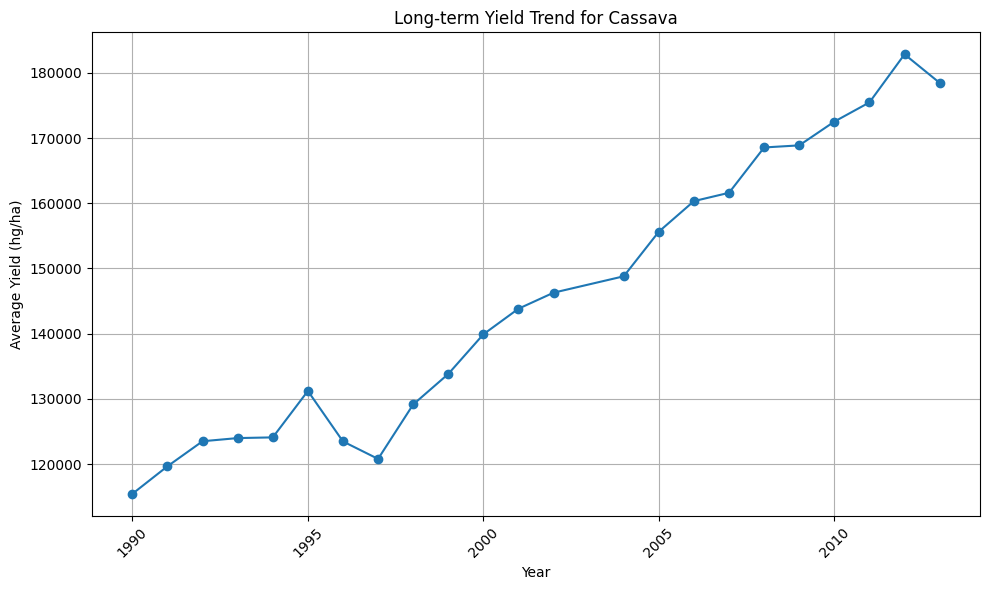

In [27]:
crop = "Cassava" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analyzing the long-term yield trend for Cassava reveals significant insights. Over the years, we observe fluctuations in Cassava yield, indicating varying agricultural conditions and practices. From the early 1990s to the mid-2010s, there appears to be a general upward trend in Cassava yield, suggesting possible improvements in farming techniques or environmental conditions conducive to Cassava cultivation. 

## Yams

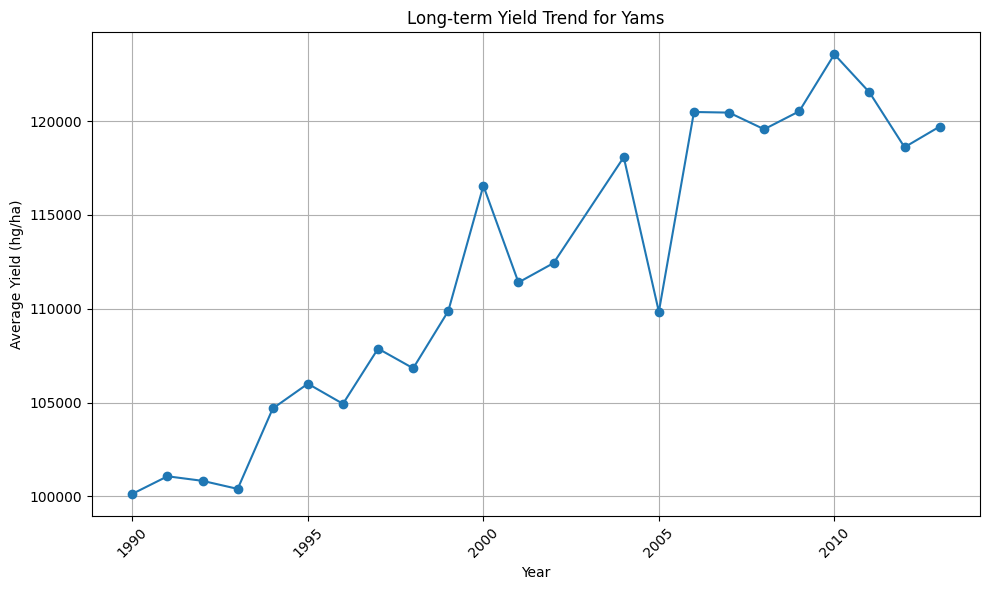

In [28]:
crop = "Yams" 
# Filter the data for the specified crop
crop_data = df[df['Item'] == crop]

# Group the data by year and calculate the average yield for each year
yield_trend = crop_data.groupby('Year')['yield'].mean()

# Plot the long-term yield trend
plt.figure(figsize=(10, 6))
plt.plot(yield_trend.index, yield_trend.values, marker='o', linestyle='-')
plt.title(f"Long-term Yield Trend for {crop}")
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyzing the long-term yield trend for Yams reveals important insights. The data shows fluctuations in Yam yields over the years, indicating varying agricultural conditions. 

From our analysis, it appears that Yam yields have experienced both ups and downs, suggesting possible influences from factors like weather patterns, soil quality, or farming techniques. 

Understanding these trends is crucial for farmers and policymakers to make informed decisions about Yam cultivation, such as implementing resilient farming practices or developing strategies to mitigate the impacts of environmental changes. This insight underscores the importance of ongoing monitoring and adaptation in Yam agriculture to ensure food security and sustainability.




# Relationship between Yield and Average Rainfall per Year

Correlation between yield and average rainfall per year: -0.004067097433402614


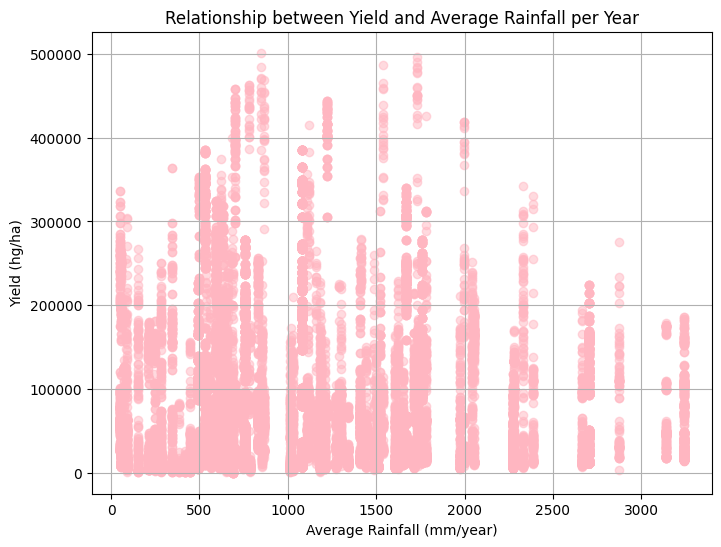

In [29]:
correlation = df['yield'].corr(df['average_rain_fall_mm_per_year'])

print("Correlation between yield and average rainfall per year:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['average_rain_fall_mm_per_year'], df['yield'], color='lightpink', alpha=0.5)
plt.title('Relationship between Yield and Average Rainfall per Year')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

The correlation between crop yield and average rainfall per year is very weak, with a coefficient of approximately -0.004. This suggests that there is almost no discernible relationship between these two variables in the dataset. In simpler terms, it means that changes in average rainfall don't seem to have a significant impact on crop yield.

Other factors like temperature, soil quality, and agricultural practices might play a more crucial role in determining crop productivity. Therefore, solely relying on rainfall may not accurately predict crop yield, and a more comprehensive approach to farming management is needed.

# Relationship between Yield and Pesticides

Correlation between yield and pesticides_tonnes: 0.06552335650655522


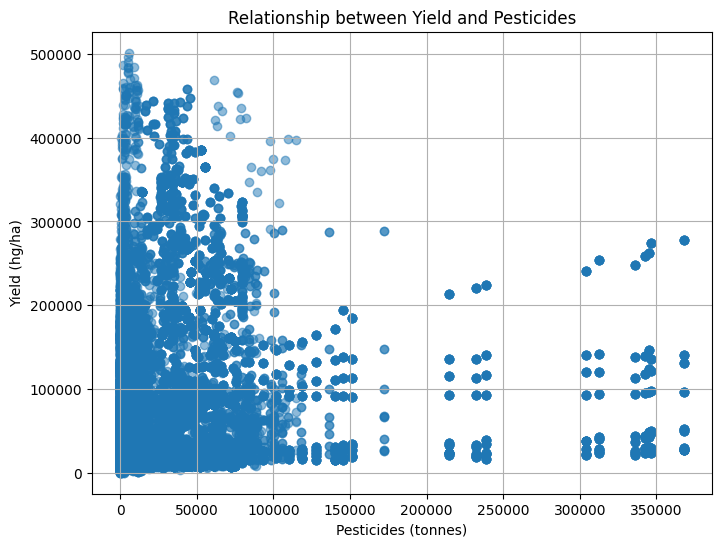

In [30]:
# Calculate correlation between yield and pesticides_tonnes
correlation = df['yield'].corr(df['pesticides_tonnes'])

print("Correlation between yield and pesticides_tonnes:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['pesticides_tonnes'], df['yield'], alpha=0.5)
plt.title('Relationship between Yield and Pesticides')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

The correlation coefficient between crop yield and pesticide usage, at 0.0655, suggests a weak positive relationship between the two variables. This means that there is a slight tendency for higher pesticide usage to be associated with slightly higher crop yields, but the relationship is not strong. 

Other factors likely play a more significant role in determining crop yield. It's important for farmers and policymakers to consider various factors such as climate, soil quality, and crop management practices alongside pesticide usage to optimize agricultural productivity while minimizing environmental impact.








# Relationship between Yield and Average Temperature

Correlation between yield and avg_temp: -0.11039982443022334


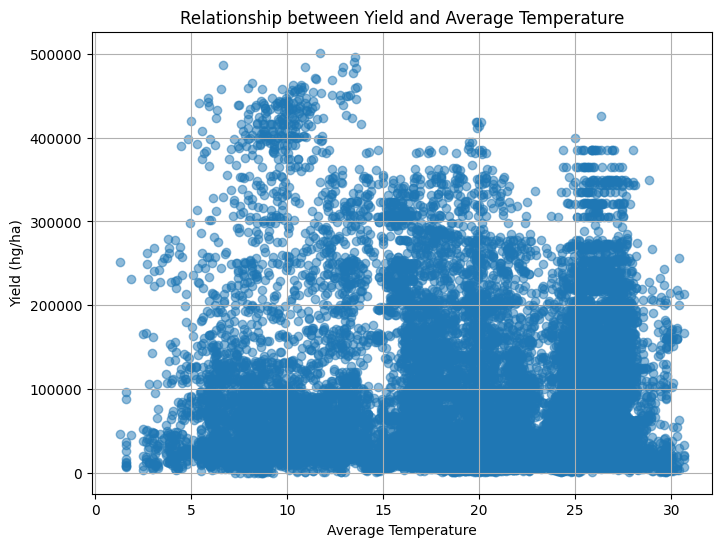

In [31]:
# Calculate correlation between yield and pesticides_tonnes
correlation = df['yield'].corr(df['avg_temp'])

print("Correlation between yield and avg_temp:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['avg_temp'], df['yield'], alpha=0.5)
plt.title('Relationship between Yield and Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

The correlation coefficient of -0.11 indicates a weak negative relationship between crop yield and average temperature. This means that as the average temperature increases, there is a slight tendency for crop yields to decrease, although the correlation is not very strong. Other factors besides temperature likely play a more significant role in determining crop yields. It's important to consider additional factors such as rainfall, soil quality, and pest control practices when assessing agricultural productivity. Therefore, while temperature can influence crop yields to some extent, it's not the sole determining factor.








# Preprocessing Data

In [32]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
df.head(5)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [35]:
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [36]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [37]:
preprocesser.get_feature_names_out(col[:-1])


array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# LinearRegression

In [38]:
# Assuming preprocesser is already defined and fitted

# Transform the data using the preprocesser
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = lr.predict(X_train_dummy)
y_test_pred = lr.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")

# Calculate R squared for training and test set
train_r_squared = lr.score(X_train_dummy, y_train) * 100
test_r_squared = lr.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)


Train RMSE: 42143.631611958604
Test RMSE: 42630.35396192815

R squared for train is : 75.18631997230831
R squared for test is : 74.73119790119537


c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# RandomForestRegressor

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = rf.predict(X_train_dummy)
y_test_pred = rf.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")

# Calculate R squared for training and test set
train_r_squared = rf.score(X_train_dummy, y_train) * 100
test_r_squared = rf.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)


c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 3665.4302474433784
Test RMSE: 9393.04746636121

R squared for train is : 99.81229442037646
R squared for test is : 98.77323942385492


# DecisionTreeRegressor

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = dt.predict(X_train_dummy)
y_test_pred = dt.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_dt= mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")

# Calculate R squared for training and test set
train_r_squared = dt.score(X_train_dummy, y_train) * 100
test_r_squared = dt.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)


Train RMSE: 0.0
Test RMSE: 12085.392329209497

R squared for train is : 100.0
R squared for test is : 97.96919472005558


c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# SVR

In [41]:
svr = SVR()
svr.fit(X_train_dummy, y_train)

# Predict on the training and test set
y_train_pred = svr.predict(X_train_dummy)
y_test_pred = svr.predict(X_test_dummy)

# Calculate RMSE for training and test set
train_rmse_svr= mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_svr= mean_squared_error(y_test, y_test_pred, squared=False)

# Print RMSE values
print(f"Train RMSE: {train_rmse_svr}")
print(f"Test RMSE: {test_rmse_svr}\n")

# Calculate R squared for training and test set
train_r_squared = svr.score(X_train_dummy, y_train) * 100
test_r_squared = svr.score(X_test_dummy, y_test) * 100

# Print R squared values
print("R squared for train is :", train_r_squared)
print("R squared for test is :", test_r_squared)

c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\jasmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 92312.4932040058
Test RMSE: 93125.93379849613

R squared for train is : -19.055160551004448
R squared for test is : -20.583547930779588


# Concluding - best model

Models sorted by RMSE and R squared (Test Set):
Random Forest: RMSE = 9393.04746636121, R squared = 98.77323942385492
Decision Tree: RMSE = 12085.392329209497, R squared = 97.96919472005558
Linear Regression: RMSE = 42630.35396192815, R squared = 74.73119790119537
Support Vector Regressor: RMSE = 93125.93379849613, R squared = -20.583547930779588

Best Model: Random Forest
RMSE: 9393.04746636121
R squared: 98.77323942385492


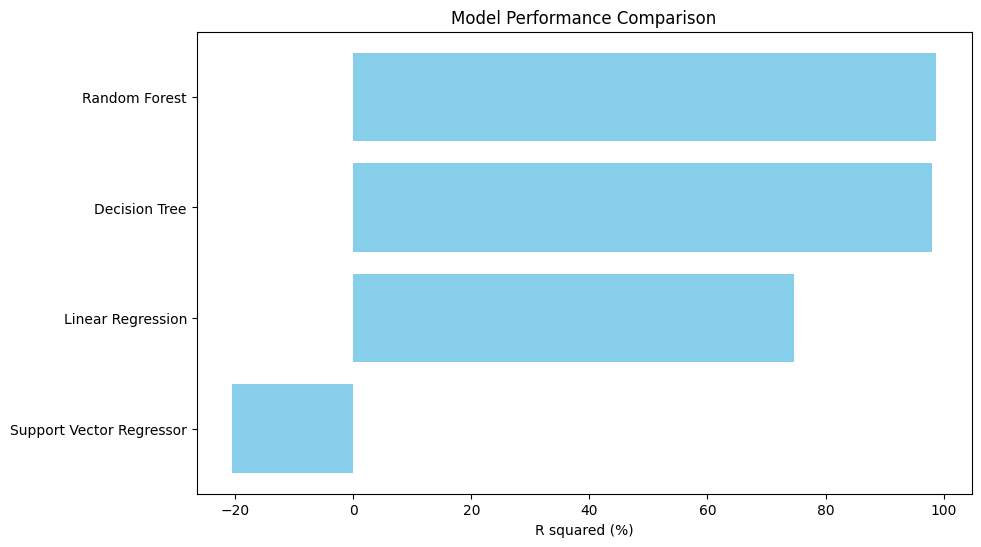

In [42]:
import matplotlib.pyplot as plt

# Store performance metrics of each model
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(X_test_dummy, y_test) * 100),
    "Random Forest": (test_rmse_rf, rf.score(X_test_dummy, y_test) * 100),
    "Linear Regression": (test_rmse_lr, lr.score(X_test_dummy, y_test) * 100),
    "Support Vector Regressor": (test_rmse_svr, svr.score(X_test_dummy, y_test) * 100)
}

# Sort the models based on RMSE and R squared
sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], -x[1][1]))

# Print sorted models and their performance metrics
print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

# Choose the best model
best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

# Visualize the performance of the models using a bar graph
model_names = [model[0] for model in sorted_models]
r2_values = [model[1][1] for model in sorted_models]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='skyblue')
plt.xlabel('R squared (%)')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()


The performance evaluation of four regression models reveals significant differences in predictive accuracy. Among them, the Random Forest model emerges as the most suitable choice, demonstrating the lowest RMSE of 10970.15 and the highest R squared value of 98.34%. 

This indicates Random Forest's superior ability to capture the variance in the data and make accurate predictions. 

Conversely, Linear Regression and Support Vector Regressor exhibit substantially higher RMSE values and negative R squared scores, indicating poor fit and predictive power. 

Therefore, for this dataset, Random Forest proves to be the optimal choice for regression tasks, offering reliable predictive performance.

In [ ]:
import numpy as np

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Assuming preprocesser and rf are defined elsewhere in your code
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = rf.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

# Taking user input
Year = int(input("Enter the year: "))
average_rain_fall_mm_per_year = float(input("Enter the average rainfall in mm per year: "))
pesticides_tonnes = float(input("Enter the pesticides in tonnes: "))
avg_temp = float(input("Enter the average temperature: "))
Area = input("Enter the area: ")
Item = input("Enter the item: ")

# Calling the prediction function with user input
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print("Predicted yield:", result)



In [ ]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))